# Movie Recommendation System Project - Recommendation System Draft

### Importing packages

In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF 
from sklearn.metrics.pairwise import cosine_similarity

### Reading the CSV

In [2]:
movie_df = pd.read_csv('movie_model.csv')

In [3]:
#making movie title with year the index
movie_df.set_index('Title Year', inplace=True)

## Creating the recommendation system

### 1. Create vectors from tokenized documents 

In [4]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(['film', 'wa', 'ha', 'asks', 'say', 'tell', 'live'])

vectorizer = TfidfVectorizer(stop_words=my_stop_words)
doc_word = vectorizer.fit_transform(movie_df['Plot modeling'])
doc_word.shape

(33931, 50238)

### Looking at the 50 most common words in the corpus - visualization interlude

In [5]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [25]:
feature_names = vectorizer.get_feature_names()
tfidf_vec = np.asarray(doc_word.sum(axis=0)).ravel()
zipped = list(zip(feature_names, tfidf_vec))

x, y = (list(x) for x in zip(*sorted(zipped, key=lambda x: x[1], reverse=True)))


# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[0:50],
            y = y[0:50],
            marker= dict(colorscale='blues',
                         color = y[0:50]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 Most Common Words after Preprocessing',
    plot_bgcolor='rgba(0,0,0,0)'
)



fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

### 2. Create topics from vectors 

In [5]:
nmf_model = NMF(30, random_state=10, max_iter=1000)
doc_topic = nmf_model.fit_transform(doc_word)
doc_topic.shape

/Users/ceciliabell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


(33931, 30)

#### Looking at words for each topic 

In [6]:
topic_word = nmf_model.components_
topic_word.shape

(30, 50238)

In [7]:
words = vectorizer.get_feature_names()
t = nmf_model.components_.argsort(axis=1)[:,::-1]
topic_words = [[words[e] for e in l] for l in t]
topic_words

[['leave',
  'friend',
  'ask',
  'day',
  'meet',
  'home',
  'night',
  'work',
  'party',
  'make',
  'time',
  'return',
  'apartment',
  'relationship',
  'job',
  'begin',
  'try',
  'visit',
  'date',
  'decide',
  'talk',
  'want',
  'hotel',
  'room',
  'later',
  'sex',
  'realize',
  'end',
  'spend',
  'year',
  'break',
  'new',
  'start',
  'kiss',
  'arrive',
  'agree',
  'offer',
  'dinner',
  'come',
  'just',
  'invite',
  'stay',
  'write',
  'walk',
  'feel',
  'away',
  'morning',
  'run',
  'reveal',
  'feeling',
  'learn',
  'finally',
  'way',
  'explain',
  'letter',
  'look',
  'think',
  'know',
  'old',
  'boyfriend',
  'book',
  'attend',
  'dance',
  'like',
  'phone',
  'office',
  'drink',
  'company',
  'life',
  'best',
  'hospital',
  'share',
  'girlfriend',
  'wait',
  'refuse',
  'thing',
  'sleep',
  'let',
  'admit',
  'restaurant',
  'bar',
  'good',
  'instead',
  'receive',
  'month',
  'doesn',
  'believe',
  'continue',
  'soon',
  'eventual

### 3. Create matrix showing movies and the degree to which they belong to each topic

In [6]:
doc_topic_nmf = pd.DataFrame(doc_topic.round(5),
                             index = movie_df.index)
doc_topic_nmf

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Title Year,,,,,,,,,,,,,,,,,,,,,
Kansas Saloon Smashers 1901,0.00601,0.00000,0.00026,0.01286,0.00000,0.00000,0.00000,0.00176,0.00067,0.00000,...,0.00000,0.00000,0.00000,0.00050,0.00118,0.00000,0.00000,0.00108,0.00319,0.02041
Love by the Light of the Moon 1901,0.00756,0.00000,0.00000,0.00776,0.00000,0.00000,0.00000,0.00000,0.00032,0.00000,...,0.00000,0.00034,0.00000,0.00205,0.00000,0.00008,0.00007,0.00000,0.00000,0.02987
The Martyred Presidents 1901,0.00266,0.00000,0.00222,0.00726,0.00000,0.00000,0.00323,0.00000,0.00000,0.00000,...,0.02985,0.00244,0.00000,0.00043,0.00000,0.00000,0.00070,0.00569,0.00000,0.00112
"Terrible Teddy, the Grizzly King 1901",0.00000,0.00281,0.00332,0.00419,0.00080,0.00000,0.00252,0.00000,0.00000,0.00000,...,0.00074,0.00400,0.00000,0.01479,0.00000,0.00000,0.00000,0.01228,0.00000,0.00156
Jack and the Beanstalk 1902,0.00108,0.00233,0.00714,0.02123,0.00141,0.00000,0.00000,0.00000,0.00000,0.00092,...,0.00000,0.00000,0.00010,0.00239,0.00051,0.01699,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sivas 2014,0.01019,0.00625,0.00710,0.01500,0.02919,0.02096,0.00000,0.00000,0.01262,0.02925,...,0.01189,0.00000,0.00178,0.00987,0.00000,0.00126,0.00030,0.00000,0.00000,0.00000
The Water Diviner 2014,0.01210,0.00504,0.00702,0.01195,0.00000,0.00000,0.00000,0.00000,0.00000,0.00731,...,0.00000,0.00000,0.00588,0.00000,0.00552,0.00930,0.01157,0.04153,0.01250,0.00000
Olanlar Oldu 2017,0.00160,0.00242,0.00000,0.00000,0.00000,0.00021,0.00000,0.00000,0.03309,0.02131,...,0.00311,0.00000,0.01645,0.00000,0.01591,0.02226,0.00000,0.00000,0.00000,0.00000


### Looking at TSNE plot

In [16]:
from sklearn.manifold import TSNE
import seaborn as sns

In [12]:
tsne = TSNE(n_components=2, random_state=22)
X_tsne = tsne.fit_transform(doc_topic_nmf)

<AxesSubplot:xlabel='X_tsne', ylabel='Y_tsne'>

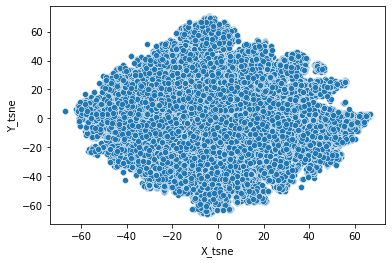

In [22]:
p_df['X_tsne'] = X_tsne[:, 0]
p_df['Y_tsne'] = X_tsne[:, 1]

sns.scatterplot(data = p_df, x=p_df['X_tsne'], y=p_df['Y_tsne'])

### 5. Finding similarity between each movie based on the degree to which they belong to each topic

In [9]:
cosine_sim = cosine_similarity(doc_topic_nmf, doc_topic_nmf)

### 6. Creating recommendation function

In [11]:
# creating a Series for the movie titles so they are associated to an ordered numerical 
#list I will use in the function to match the indexes
indices = pd.Series(movie_df.index)
indices[:5]

0              Kansas Saloon Smashers 1901
1       Love by the Light of the Moon 1901
2             The Martyred Presidents 1901
3    Terrible Teddy, the Grizzly King 1901
4              Jack and the Beanstalk 1902
Name: Title Year, dtype: object

In [43]:
#  defining the function that takes in movie title with year as input and returns the top 10 recommended movies
def recommendations(title, cosine_sim = cosine_sim):
    
    # initializing the empty list of recommended movies
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(movie_df.index)[i])
        
    return recommended_movies

### 6.2 Attempting a recommendation system with an option to filter by origin

In [44]:
#  defining the function that takes in movie title with year as input and returns the top 10 recommended movies
def recommendations2(title, origin, cosine_sim = cosine_sim):
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    similar_idx = list((pd.Series(cosine_sim[idx]).sort_values(ascending = False)).index)
    
     # initializing the empty list of recommended movies
    recommended_movies = []

    # populating the list with the titles of the best 10 matching movies (with chosen origin/ethnicity)
    if origin is None:
        for i in similar_idx[1:11]:
            recommended_movies.append(list(movie_df.index)[i])
        
    else:    
        for i in similar_idx[1:]:
            while len(recommended_movies) < 10:
                if movie_df.iloc[i]['Origin/Ethnicity'] == origin: 
                    recommended_movies.append(movie_df.index[i])
                else:
                    pass
                break 
            
    return recommended_movies

### 7. Testing recommendation system

In [15]:
recommendations('The Notebook 2004')

["Let's Live a Little 1948",
 'Humko Tumse Pyaar Hai 2006',
 'Rhythm in the Air 1936',
 'More Than Blue 2009',
 'Stonewall 1995',
 'Hell Is Sold Out 1951',
 'And Now Tomorrow 1944',
 'Chandni 1989',
 'Pyar ka Punchnama 2011',
 'Moulin Rouge 1952']

In [49]:
recommendations2('The Notebook 2004', origin='American')

['Mr. Duck Steps Out 1940',
 'Prelude to a Kiss 1992',
 'Road to Paradise 1930',
 'Wuthering Heights 1939',
 'Spread 2009',
 'Love Potion No. 9 1992',
 'The Mostly Unfabulous Social Life of Ethan Green 2005',
 'Hello, My Name Is Doris 2016',
 'Winnie the Pooh: Seasons of Giving 1999',
 'Devotion 1946']

In [50]:
recommendations('The Godfather 1972')

['The Godfather Part II 1974',
 'Crooked House 2017',
 'Addams Family Values 1993',
 'Gotti 1996',
 'Aftermath 2017',
 'Two Against the World 1932',
 'House of Cards 1969',
 'The Witness 2012',
 'A Stranger Among Us 1992',
 'Chor Police 1983']

In [52]:
recommendations2('The Godfather 1972', origin='American')

['The Godfather Part II 1974',
 'Addams Family Values 1993',
 'Gotti 1996',
 'Aftermath 2017',
 'Two Against the World 1932',
 'House of Cards 1969',
 'A Stranger Among Us 1992',
 'Men of Respect 1991',
 'Men of Respect 1990',
 'The Romance of Rosy Ridge 1947']